# AccelerateAI - Data Science Global Bootcamp 
***Linear Regression - Assignment 05***
***

### Q6 
A trucking company wants to predict its yearly maintenance expense for its trucks using miles driven. Its data is saved in the file: MLR_TruckMaintenence.xlsx <br>
a) Estimate the MLR equation for maintenance expense vs miles driven. <br>
b) Interpret R-Squared for this dataset.<br>

In [24]:
# required libraries 
import pandas as pd                 # loading data

import matplotlib.pyplot as plt     # creating plots
from mpl_toolkits import mplot3d
import seaborn as sns    

import statsmodels.api as sm        # modeling 

In [25]:
# Read the data - note that this is an excel file not csv.
truck_df = pd.read_excel("MLR_TruckMaintenance.xlsx", sheet_name='Data')       
truck_df.head(5)

,Truck,Maintenance Expense,Miles Driven,Age of Truck
0,1,908.56,10500,10
1,2,751.12,9700,7
2,3,793.55,9200,8
3,4,619.61,8300,9
4,5,380.11,6500,5


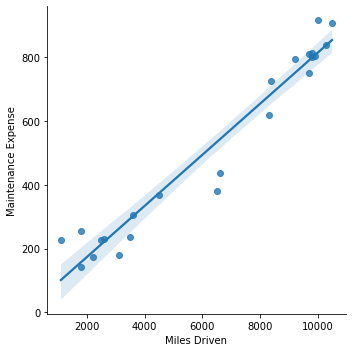

In [26]:
# Let's visualize the data first - shall we ?
sns.lmplot(x="Miles Driven",y="Maintenance Expense", data=truck_df)

#### a) Estimate the MLR equation using given data

In [27]:
# Let's train the linear regression model 

Y = truck_df["Maintenance Expense"]

X = truck_df['Miles Driven']
X = sm.add_constant(X) # adding a constant

reg_model = sm.OLS(Y,X).fit()

In [28]:
# View the model parameters
print(reg_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Maintenance Expense   R-squared:                       0.948
Model:                             OLS   Adj. R-squared:                  0.945
Method:                  Least Squares   F-statistic:                     382.2
Date:                 Tue, 30 Aug 2022   Prob (F-statistic):           5.92e-15
Time:                         09:28:18   Log-Likelihood:                -128.22
No. Observations:                   23   AIC:                             260.4
Df Residuals:                       21   BIC:                             262.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.2242     29.398    

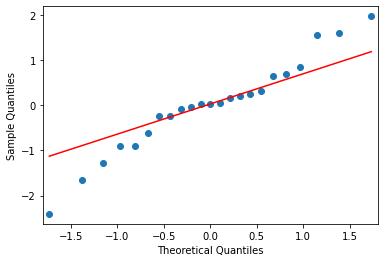

In [29]:
# Q-Q Plot
residuals = reg_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

#### The Q-Q plot shows sign of  normality of residual being violated slightly at both the ends. The data might require some treatment.

**Answers:**

a) MLR equation for maintenance expense vs miles driven <br>

Let us first check the model outputs: <br>
- F-Test : p-value = Prob (F-statistic): 5.92e-15 => The model is significant overall
- Coefficients:<br>
  - Miles Driven : beta = 0.08 , p-value of t-test : 0.000 *** => Significant at 95% CI*** <br>
- Regression Equation:<br>
 Maintenance Expense = 11.4184 + 0.08*Miles Driven
 
b)Interpret R-Squared for this dataset.

The R-Squared value in 0.948. This implies than 94.8% variation in the expense is explained by variation in the miles driven

***

### Q7 

Benedrix, a machine tool company in interested in understand the impact of machine hours and production run, on its overhead cost. 
The data on a monthly basis for 3 years is provided in the dataset: MLR_FactoryOverhead.csv

Fit the regression equations: 
 - Overhead = F (machine hours)
 - Overhead = F (production runs)

a)	Is production run strongly correlated with machine hours? <br>
b)	Find the R-Squared in both the above cases? <br>
c)	Which variable is a better predictor of Overhead cost?

In [30]:
# Read the data - note that this is an excel file not csv.
factory_df = pd.read_csv("MLR_FactoryOverhead.csv")       
factory_df.head(5)

,Month,Machine Hours,Production Runs,Overhead Cost
0,1,1539,31,99798
1,2,1284,29,87804
2,3,1490,27,93681
3,4,1355,22,82262
4,5,1500,35,106968


In [31]:
model_df = factory_df.drop(columns="Month") # Month not required for modeling

#Correlation 
model_df.corr()

,Machine Hours,Production Runs,Overhead Cost
Machine Hours,1.000000,-0.229093,0.631885
Production Runs,-0.229093,1.000000,0.520544
Overhead Cost,0.631885,0.520544,1.000000


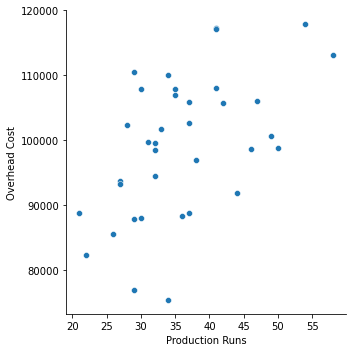

In [32]:
# Let's visualize the data first - shall we ?
sns.relplot(x="Production Runs",y="Overhead Cost", data=model_df)

In [33]:
# Linear regression model 
Y = model_df["Overhead Cost"]
X1 = sm.add_constant(model_df["Machine Hours"])
X2 = sm.add_constant(model_df["Production Runs"])

model_1 = sm.OLS(Y,X1).fit()
model_2 = sm.OLS(Y,X2).fit()

In [34]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Overhead Cost   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     22.60
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.57e-05
Time:                        09:28:18   Log-Likelihood:                -376.13
No. Observations:                  36   AIC:                             756.3
Df Residuals:                      34   BIC:                             759.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.862e+04   1.07e+04      4.533      0.000    2.68e+04    7.04e+04
Machine Hours    34.7022      7.300      4.754      0.000      19.867      49.537
==============================================================================
Omnibus:                        0.251   Durbin-Watson:                   2.451
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.140
Skew:                           0.141   Prob(JB):                        0.933
Kurtosis:                       2.886   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Overhead Cost   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     12.64
Date:                Tue, 30 Aug 2022   Prob (F-statistic):            0.00114
Time:                        09:28:18   Log-Likelihood:                -379.62
No. Observations:                  36   AIC:                             763.2
Df Residuals:                      34   BIC:                             766.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.561e+04   6808.611     11.104      0.000    6.18e+04    8.94e+04
Production Runs   655.0707    184.275      3.555      0.001     280.579    1029.562
==============================================================================
Omnibus:                        0.597   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.683
Skew:                          -0.264   Prob(JB):                        0.711
Kurtosis:                       2.580   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


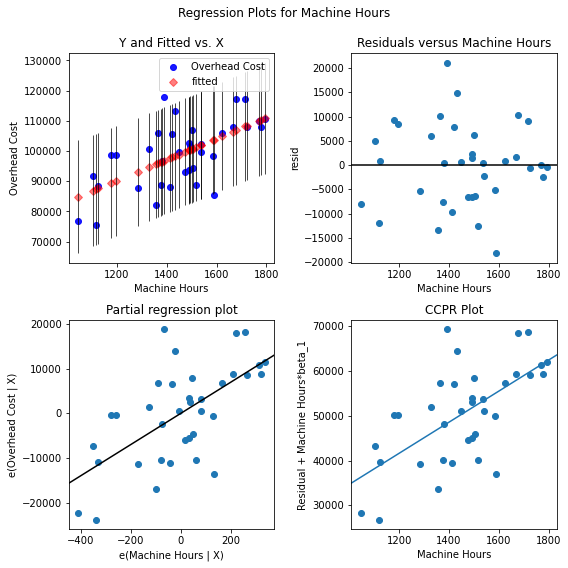

In [36]:
# Define figure size
figure1 = plt.figure(figsize=(8,8))

# Produce regression plots for logreg_model
fig=sm.graphics.plot_regress_exog(model_1, 'Machine Hours', fig=figure1)

eval_env: 1


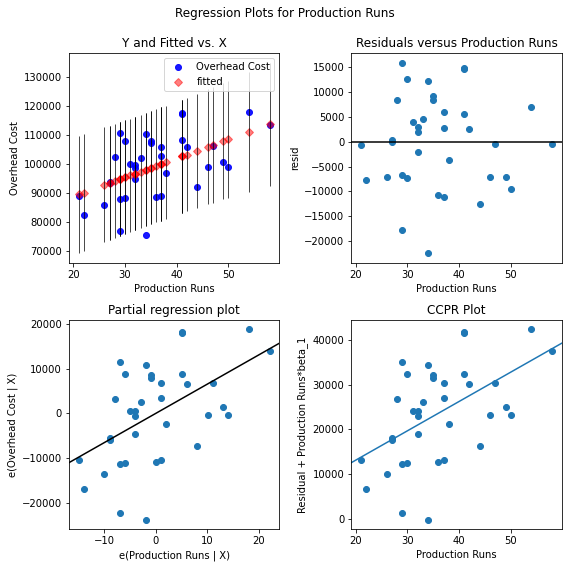

In [37]:
# Define figure size
figure1 = plt.figure(figsize=(8,8))

# Produce regression plots for logreg_model
fig=sm.graphics.plot_regress_exog(model_2, "Production Runs", fig=figure1)

#### In both the above residual plots, we obeserve no sign of model assumption violation. 

In [38]:
# R-Square of the 2 competing models

print(f'''R squared for
     model1: {model_1.rsquared}
     model2: {model_2.rsquared}''')

R squared for
     model1: 0.39927805304353925
     model2: 0.2709655638064027


**Answers:** <br>

a)	Is production run strongly correlated with machine hours? <br>
    No, the correlation is only about 0.520544 <br>
    
b)	Find the R-Squared in both the above cases? <br>
  R squared for: <br>
     model1 - Machine Hours:   0.399 <br>
     model2 - Production Runs: 0.271 <br>

c)	Which variable is a better predictor of Overhead cost? <br>
   Both Machine Hours and Production run are significant.  <br>
   The R-Squared of model with Machine hours is higher than Production Runs. Hence Machine hours in more significant. 

***